### CSE-221710313059-T.Yasasvi

#### Read the dataset below which was used for Logistic Regression:
https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv



- Apply the KNN Algorithm on the dataset .
- Compute all the classification metrics
- Plot the ROC Curve for the model and find the AUC
- Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [6]:
data.drop(['CASENUM'],axis=1,inplace=True)
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [7]:
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [9]:
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [10]:
X = data.iloc[:,1:]
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [11]:
y = data.ATTORNEY
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

### Logistic Regression :

In [13]:
#Training Data

from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[314, 173],
       [ 95, 356]], dtype=int64)

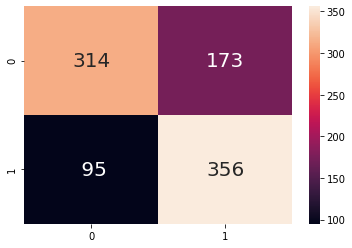

In [16]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [17]:
#Testing Data

from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_test,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[ 99,  99],
       [ 35, 169]], dtype=int64)

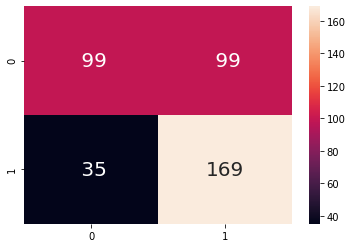

In [20]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       487
           1       0.67      0.79      0.73       451

    accuracy                           0.71       938
   macro avg       0.72      0.72      0.71       938
weighted avg       0.72      0.71      0.71       938

              precision    recall  f1-score   support

           0       0.74      0.50      0.60       198
           1       0.63      0.83      0.72       204

    accuracy                           0.67       402
   macro avg       0.68      0.66      0.66       402
weighted avg       0.68      0.67      0.66       402



### KNN Algorithm : 

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
#Scaling for training data

scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.864142,0.323773,-0.118550,1.125005,0.482957
1,0.864142,0.323773,-0.118550,-1.005695,0.121123
2,-1.157217,0.323773,-0.118550,-1.107157,0.660376
3,0.864142,0.323773,8.435274,-1.310081,-0.030183
4,-1.157217,0.323773,-0.118550,-0.802771,0.065398
...,...,...,...,...,...
933,0.864142,0.323773,-0.118550,1.226466,-0.410509
934,0.864142,0.323773,-0.118550,1.023543,-0.232465
935,0.864142,0.323773,-0.118550,-0.549116,-0.030683
936,-1.157217,0.323773,-0.118550,-0.802771,-0.415507


In [25]:
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,-1.083039,0.289064,-0.151330,-0.780654,-0.324633
1,-1.083039,0.289064,-0.151330,-0.780654,3.001351
2,0.923328,0.289064,-0.151330,-0.879464,-0.268778
3,0.923328,0.289064,-0.151330,-0.928870,0.185782
4,0.923328,0.289064,6.608076,0.899128,3.381416
...,...,...,...,...,...
397,0.923328,0.289064,-0.151330,-1.126491,-0.304262
398,0.923328,0.289064,-0.151330,1.689614,-0.278698
399,-1.083039,0.289064,-0.151330,-0.879464,-0.200275
400,-1.083039,0.289064,6.608076,0.207453,-0.322170


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)#,metric='euclidean')
    knn_model.fit(scaled_X_train,y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.582089552238806,
 0.5671641791044776,
 0.6194029850746269,
 0.6169154228855721,
 0.6442786069651741,
 0.5870646766169154,
 0.654228855721393,
 0.6169154228855721,
 0.6243781094527363,
 0.6019900497512438,
 0.6318407960199005,
 0.6144278606965174,
 0.6517412935323383,
 0.6368159203980099,
 0.6343283582089553,
 0.6169154228855721,
 0.6417910447761194,
 0.6343283582089553,
 0.6442786069651741]

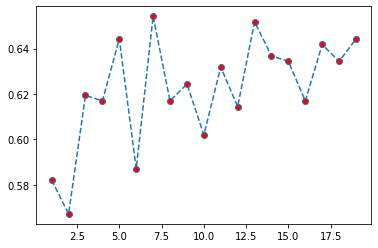

In [27]:
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

In [28]:
final_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [29]:
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,

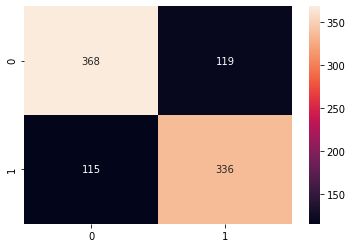

In [30]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d')

In [31]:
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       487
           1       0.74      0.75      0.74       451

    accuracy                           0.75       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.75      0.75      0.75       938



In [32]:
#Prediction on Test Data

final_test_pred = final_model.predict(scaled_X_test) #y_test
final_test_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

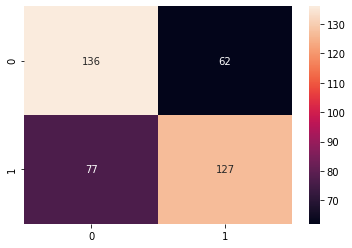

In [33]:
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [34]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       198
           1       0.67      0.62      0.65       204

    accuracy                           0.65       402
   macro avg       0.66      0.65      0.65       402
weighted avg       0.66      0.65      0.65       402



In [35]:
y_test_prob=final_model.predict_proba(scaled_X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,0.428571,0.571429
1,1.000000,0.000000
2,0.571429,0.428571
3,0.714286,0.285714
4,0.714286,0.285714
...,...,...
397,0.714286,0.285714
398,0.285714,0.714286
399,0.428571,0.571429
400,0.714286,0.285714


In [36]:
#Logistic Regression

y_test_prob1=reg.predict_proba(X_test)
y_test_prob1=pd.DataFrame(y_test_prob1)
y_test_prob1

,0,1
0,0.418403,0.581597
1,0.998445,0.001555
2,0.368273,0.631727
3,0.595475,0.404525
4,0.999378,0.000622
...,...,...
397,0.349051,0.650949
398,0.390687,0.609313
399,0.480072,0.519928
400,0.526419,0.473581


In [37]:
y_test

1186    1
403     0
1062    1
523     0
1286    0
       ..
1088    0
65      1
508     0
765     0
967     0
Name: ATTORNEY, Length: 402, dtype: int64

In [38]:
#Roc curve

from sklearn.metrics import roc_auc_score,roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,m_prob,pos_label=1)
print(fpr)
print(tpr)
print(threshold)
print(pd.DataFrame(threshold))

[0.         0.02525253 0.05555556 0.20707071 0.31313131 0.53535354
 0.7979798  0.9040404  1.        ]
[0.         0.05392157 0.1127451  0.34313725 0.62254902 0.78921569
 0.93627451 0.99019608 1.        ]
[2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]
          0
0  2.000000
1  1.000000
2  0.857143
3  0.714286
4  0.571429
5  0.428571
6  0.285714
7  0.142857
8  0.000000


In [40]:
#Logistic Regression
m_prob1 = reg.predict_proba(scaled_X_test)[:,1]
fpr1,tpr1,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)

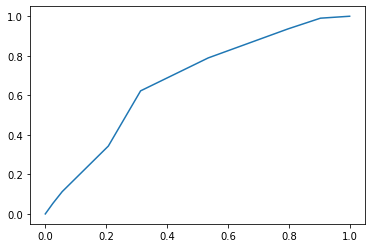

In [41]:
plt.plot(fpr,tpr)

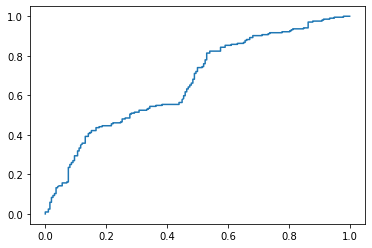

In [42]:
#Logistic Regression

plt.plot(fpr1,tpr1)

In [44]:
#Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC

roc_auc_score(y_test,m_prob)

0.6700460487225194

In [45]:
#Logistic Regression

roc_auc_score(y_test,m_prob1)

0.6689319667260843